In [75]:
import numpy as np
# основная библиоткека, именно на её плечи и лягут все расчёты

В данном случе рассматривается поляризация перпендикулярная плоскости антенна+наблюдатель, но комплексные числа и вектора в numpy тоже есть, код модифициировать не долго.

Что бы не писать цикл for сдлаем массив сразу.
В питоне этот приём окажется быстрее за счёт отказа от циклов, которые в нём выполняются долго.
В си такая оптимизация работать будет разве что в случае деления или умножения, только память зря потратим.

In [76]:
# Инициализация 
R_wall = 100
x = np.linspace(0, R_wall, 400)
h1 = 20.0
h2 = 2.0
P = 1
D = 1
wavelambda = 3
r_ground = 0.5
r_wall = 0.3
# print(x)


In [77]:
k = 2*np.pi/wavelambda 
R1 = np.sqrt((h1-h2)**2 + x**2)
R2 = np.sqrt((2*h1+h2)**2 + x**2)
R3 = np.sqrt((h1-h2)**2 + (2*R_wall - x)**2)
# тут чесно посчитал методом изображений 
R45= np.sqrt((2*h1+h2)**2 + (2*R_wall - x)**2)

In [78]:
E1 = np.sqrt(30 * P * D)/R1 
E2 = np.sqrt(30 * P * D)/R2 * r_ground
E3 = np.sqrt(30 * P * D)/R3 * r_wall
E45= np.sqrt(30 * P * D)/R45* r_ground * r_wall
E_re = (E1 * np.cos(k * R1) + 
        E2 * np.cos(k * R2) + 
        E3 * np.cos(k * R3) + 
        E45* np.cos(k * R45))
E_im = (E1 * np.sin(k * R1) + 
        E2 * np.sin(k * R2) + 
        E3 * np.sin(k * R3) + 
        E45* np.sin(k * R45))
E_co = np.sqrt(E_re**2 + E_im**2)
# print (E1)

Тут постороение графиков в библиотеке matplotlib.
В случае создания приложения с графическим интерфейсом рекомендую присмотреться к PyQt + PythonQwt.

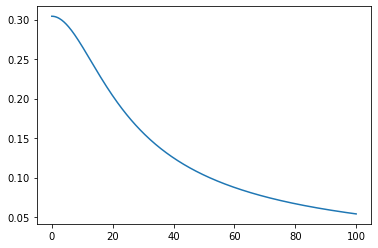

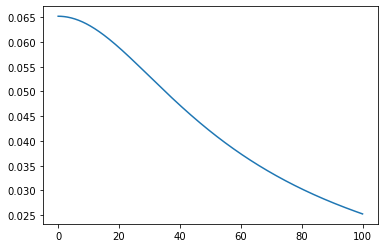

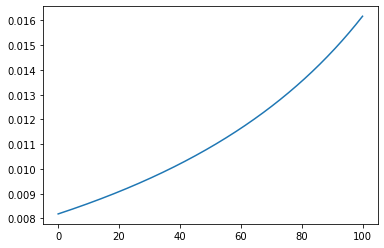

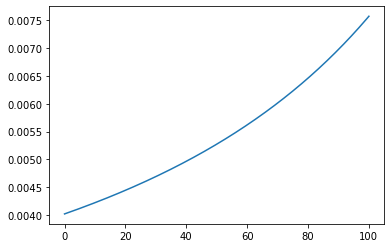

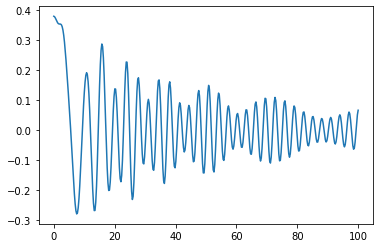

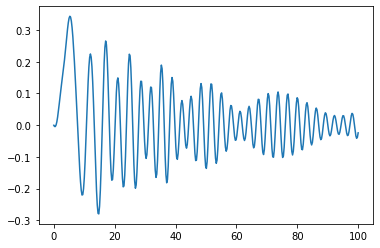

In [79]:
import matplotlib.pyplot as plt
plt.plot(x, E1)
plt.show()
plt.plot(x, E2)
plt.show()
plt.plot(x, E3)
plt.show()
plt.plot(x, E45)
plt.show()
plt.plot(x, E_re)
plt.show()
plt.plot(x, E_im)
plt.show()

Для какого случая тут я не помню.

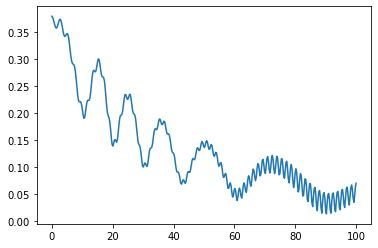

In [80]:
plt.plot(x, E_co)
plt.show()